In [30]:
import datetime
start = datetime.datetime.now()
import pandas as pd
lc = pd.read_csv('./lc_14to16.csv')   
stop = datetime.datetime.now()
print(stop - start)
print(lc.shape)

C:\Users\Lawry\AppData\Local\Temp\ipykernel_55540\2084061215.py:4: DtypeWarning: Columns (19,59,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  lc = pd.read_csv('./lc_14to16.csv')


0:00:11.865666
(1091131, 151)


In [31]:
# Task 1: Combine employment length into 3 categories
lc["emp_length"] = lc["emp_length"].replace(['< 1 year', '1 year'], '0-1 years')
lc["emp_length"] = lc["emp_length"].replace(['2 years', '3 years', '4 years', '5 years'], '2-5 years')
lc["emp_length"] = lc["emp_length"].replace(['6 years', '7 years', '8 years', '9 years', '10+ years'], '5+ years')

# Task 2: Remove "ANY" category data for home_ownership
lc = lc[lc["home_ownership"] != "ANY"]

# Task 3: Clean other columns: subset and remove rows with missing or invalid data if needed

# Select the required columns
cleaned_columns = [
    'loan_amnt', 'annual_inc', 'dti', 'acc_now_delinq', 'tot_coll_amt', 
    'tot_cur_bal', 'total_rev_hi_lim', 'grade', 'emp_length', 'home_ownership',
    'funded_amnt', 'funded_amnt_inv', 'term', 'installment', 'total_rec_int'
]

# Filter out rows with missing values in these columns
lc_cleaned = lc[cleaned_columns].dropna()

# Optional: Convert data types if necessary (for example, ensure 'term' is numeric)
lc_cleaned['term'] = lc_cleaned['term'].str.extract('(\d+)').astype(int)  # Extract numeric part of 'term'

# Display cleaned dataset
lc_cleaned.head()


<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lawry\AppData\Local\Temp\ipykernel_55540\2263756099.py:22: SyntaxWarning: invalid escape sequence '\d'
  lc_cleaned['term'] = lc_cleaned['term'].str.extract('(\d+)').astype(int)  # Extract numeric part of 'term'


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,emp_length,home_ownership,funded_amnt,funded_amnt_inv,term,installment,total_rec_int
0,3600.0,55000.0,5.91,0.0,722.0,144904.0,9300.0,C,5+ years,MORTGAGE,3600.0,3600.0,36,123.03,821.72
1,24700.0,65000.0,16.06,0.0,0.0,204396.0,111800.0,C,5+ years,MORTGAGE,24700.0,24700.0,36,820.28,979.66
2,20000.0,63000.0,10.78,0.0,0.0,189699.0,14000.0,B,5+ years,MORTGAGE,20000.0,20000.0,60,432.66,2705.92
3,35000.0,110000.0,17.06,0.0,0.0,301500.0,67300.0,C,5+ years,MORTGAGE,35000.0,35000.0,60,829.90,12361.66
4,10400.0,104433.0,25.37,0.0,0.0,331730.0,34000.0,F,2-5 years,MORTGAGE,10400.0,10400.0,60,289.91,1340.50


In [32]:
from sklearn.preprocessing import StandardScaler

# Automatically find numerical columns
numerical_columns = lc_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler and transform the numerical columns
lc_cleaned[numerical_columns] = scaler.fit_transform(lc_cleaned[numerical_columns])

# Display the standardized dataset
lc_cleaned.head()


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,emp_length,home_ownership,funded_amnt,funded_amnt_inv,term,installment,total_rec_int
0,-1.322309,-0.331003,-1.462507,-0.073466,0.049882,0.003839,-0.654904,C,5+ years,MORTGAGE,-1.322306,-1.322061,-0.657457,-1.267431,-0.718118
1,1.092152,-0.194028,-0.300970,-0.073466,-0.028091,0.378504,2.132949,C,5+ years,MORTGAGE,1.092155,1.093176,-0.657457,1.453106,-0.665523
2,0.554334,-0.221423,-0.905198,-0.073466,-0.028091,0.285946,-0.527071,B,5+ years,MORTGAGE,0.554337,0.555185,1.521012,-0.059313,-0.090667
3,2.270775,0.422361,-0.186533,-0.073466,-0.028091,0.990039,0.922613,C,5+ years,MORTGAGE,2.270778,2.272179,1.521012,1.490641,3.124757
4,-0.544189,0.346107,0.764440,-0.073466,-0.028091,1.180419,0.016901,F,2-5 years,MORTGAGE,-0.544186,-0.543691,1.521012,-0.616297,-0.545361


In [33]:
# ---------------------------------------------------------------- 
# Convert grade to a tertiary variable: A,B = High, DEFG = Low,C = Medium
# Adding a new column to the dataframe called 'grade_tertiary'
# ---------------------------------------------------------------- 

start = datetime.datetime.now()

lc_cleaned['grade_tertiary'] = lc_cleaned['grade'].replace(['A', 'B'], '3.High').replace(['C'], '2.Medium').replace(['D', 'E', 'F', 'G'], '1.Low')
lc_cleaned['grade_tertiary'].value_counts()


# filter out Medium for the grade_tertiary column 
lc2 = lc_cleaned[lc_cleaned['grade_tertiary'] != '2.Medium']

stop = datetime.datetime.now()
print(stop - start)

print(lc_cleaned['grade_tertiary'].value_counts())

print(lc2['grade_tertiary'].value_counts())

lc2.head()
lc_cleaned.head()

0:00:00.459280
grade_tertiary
3.High      466221
2.Medium    300487
1.Low       260265
Name: count, dtype: int64
grade_tertiary
3.High    466221
1.Low     260265
Name: count, dtype: int64


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,emp_length,home_ownership,funded_amnt,funded_amnt_inv,term,installment,total_rec_int,grade_tertiary
0,-1.322309,-0.331003,-1.462507,-0.073466,0.049882,0.003839,-0.654904,C,5+ years,MORTGAGE,-1.322306,-1.322061,-0.657457,-1.267431,-0.718118,2.Medium
1,1.092152,-0.194028,-0.300970,-0.073466,-0.028091,0.378504,2.132949,C,5+ years,MORTGAGE,1.092155,1.093176,-0.657457,1.453106,-0.665523,2.Medium
2,0.554334,-0.221423,-0.905198,-0.073466,-0.028091,0.285946,-0.527071,B,5+ years,MORTGAGE,0.554337,0.555185,1.521012,-0.059313,-0.090667,3.High
3,2.270775,0.422361,-0.186533,-0.073466,-0.028091,0.990039,0.922613,C,5+ years,MORTGAGE,2.270778,2.272179,1.521012,1.490641,3.124757,2.Medium
4,-0.544189,0.346107,0.764440,-0.073466,-0.028091,1.180419,0.016901,F,2-5 years,MORTGAGE,-0.544186,-0.543691,1.521012,-0.616297,-0.545361,1.Low


In [34]:
start = datetime.datetime.now()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

to_encode = ['emp_length', 'home_ownership']
lc_encoded = pd.get_dummies(lc2, columns = to_encode)

stop = datetime.datetime.now()
print(stop - start)

lc_encoded.head()


0:00:00.210644


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,funded_amnt,funded_amnt_inv,term,installment,total_rec_int,grade_tertiary,emp_length_0-1 years,emp_length_2-5 years,emp_length_5+ years,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
2,0.554334,-0.221423,-0.905198,-0.073466,-0.028091,0.285946,-0.527071,B,0.554337,0.555185,1.521012,-0.059313,-0.090667,3.High,False,False,True,True,False,False
4,-0.544189,0.346107,0.764440,-0.073466,-0.028091,1.180419,0.016901,F,-0.544186,-0.543691,1.521012,-0.616297,-0.545361,1.Low,False,True,False,True,False,False
6,0.554334,1.381188,-0.460038,-0.073466,-0.028091,1.360711,1.654254,B,0.554337,0.555185,-0.657457,0.740245,-0.527612,3.High,False,False,True,True,False,False
7,0.554334,0.079923,-0.123593,-0.073466,-0.028091,-0.016962,-0.513471,B,0.554337,0.555185,-0.657457,0.715586,-0.479422,3.High,False,False,True,True,False,False
8,-0.589961,0.079923,-0.643137,-0.073466,0.872707,-0.732662,-0.083734,A,-0.589957,-0.589478,-0.657457,-0.551761,-0.659092,3.High,False,False,True,False,False,True


In [35]:
start = datetime.datetime.now()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

to_encode2 = ['emp_length', 'home_ownership']
lc_encoded2 = pd.get_dummies(lc_cleaned, columns = to_encode)

stop = datetime.datetime.now()
print(stop - start)

lc_encoded2.head()

0:00:00.254971


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,funded_amnt,funded_amnt_inv,term,installment,total_rec_int,grade_tertiary,emp_length_0-1 years,emp_length_2-5 years,emp_length_5+ years,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,-1.322309,-0.331003,-1.462507,-0.073466,0.049882,0.003839,-0.654904,C,-1.322306,-1.322061,-0.657457,-1.267431,-0.718118,2.Medium,False,False,True,True,False,False
1,1.092152,-0.194028,-0.300970,-0.073466,-0.028091,0.378504,2.132949,C,1.092155,1.093176,-0.657457,1.453106,-0.665523,2.Medium,False,False,True,True,False,False
2,0.554334,-0.221423,-0.905198,-0.073466,-0.028091,0.285946,-0.527071,B,0.554337,0.555185,1.521012,-0.059313,-0.090667,3.High,False,False,True,True,False,False
3,2.270775,0.422361,-0.186533,-0.073466,-0.028091,0.990039,0.922613,C,2.270778,2.272179,1.521012,1.490641,3.124757,2.Medium,False,False,True,True,False,False
4,-0.544189,0.346107,0.764440,-0.073466,-0.028091,1.180419,0.016901,F,-0.544186,-0.543691,1.521012,-0.616297,-0.545361,1.Low,False,True,False,True,False,False


              precision    recall  f1-score   support

       1.Low       0.91      0.80      0.85     51565
      3.High       0.90      0.96      0.93     93733

    accuracy                           0.90    145298
   macro avg       0.90      0.88      0.89    145298
weighted avg       0.90      0.90      0.90    145298



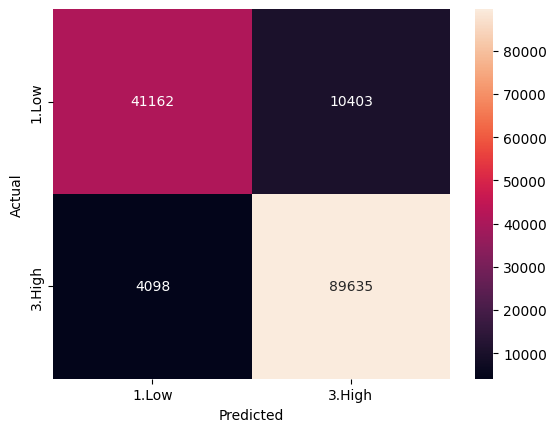

['1.Low' '3.High']


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = lc_encoded.drop(columns = ['grade_tertiary', 'grade'])
y = lc_encoded['grade_tertiary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logit = LogisticRegression(max_iter = 1000)
logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)




# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


# print a labeled confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print(logit.classes_)

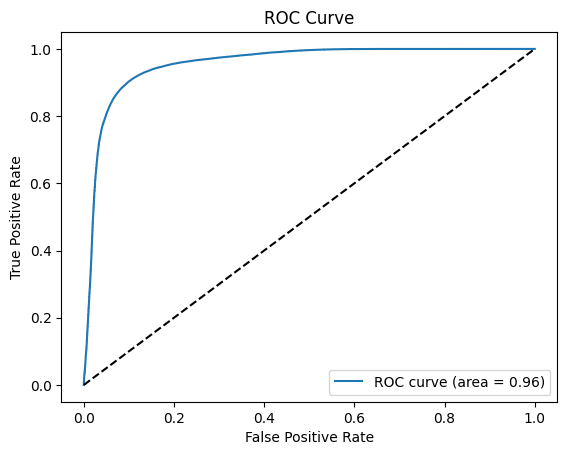

In [37]:
# ---------------------------------------------------
# Add predicted probability to the dataframe
# ---------------------------------------------------

lc_encoded['predicted'] = logit.predict(X)
lc_encoded['predicted_prob'] = logit.predict_proba(X)[:,1]
lc_encoded.head()


# ---------------------------------------------------
# ROC curve
# ---------------------------------------------------

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1], pos_label='3.High')
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

       1.Low       0.89      0.84      0.86     51565
      3.High       0.92      0.94      0.93     93733

    accuracy                           0.91    145298
   macro avg       0.90      0.89      0.90    145298
weighted avg       0.91      0.91      0.91    145298



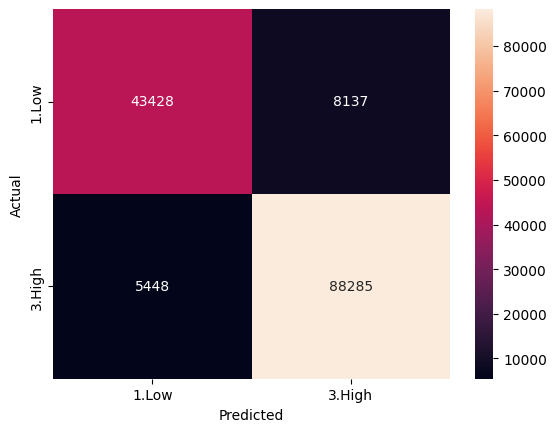

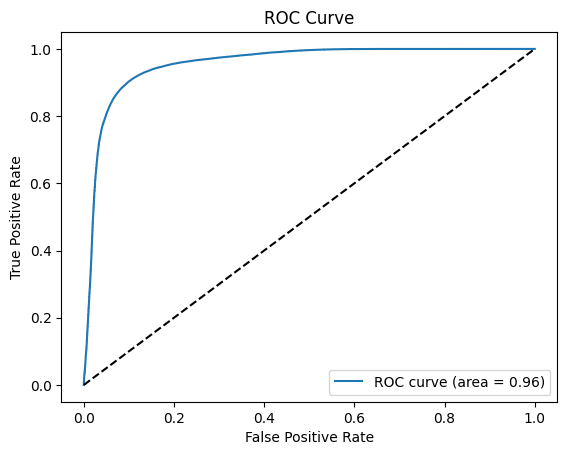

In [38]:
import numpy as np
# Now repeat the above by changing the threshold to 0.6

y_pred_06 = (logit.predict_proba(X_test)[:,1] > 0.6).astype(int)

# # Convert predicted labels back to original label types
y_pred_06 = np.where(y_pred_06 == 1, '3.High', '1.Low')

print(classification_report(y_test, y_pred_06))

cm = confusion_matrix(y_test, y_pred_06)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ---------------------------------------------------
# ROC curve
# ---------------------------------------------------

fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1], pos_label='3.High')
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [39]:
# ---------------------------------------------------
# Losgistic regression sklearn page:https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

# Hyperparameter tuning for logistic regression
# the most important hyperparameter for logistic regression is C, which is the inverse of the regularization strength   
# smaller values of C specify stronger regularization
# Regularization is a technique used to prevent overfitting by penalizing large coefficients
# The default value of C is 1


from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logit = LogisticRegression(max_iter = 1000)
logit_cv = GridSearchCV(logit, param_grid, cv = 5)
logit_cv.fit(X_train, y_train)

print(logit_cv.best_params_)
print(logit_cv.best_score_)
print(logit_cv.best_estimator_)
print(logit_cv.best_index_)
print(logit_cv.best_estimator_.C)



# create a df with the results of the grid search
# This is done to see the results of the grid search
results = pd.DataFrame(logit_cv.cv_results_)
results


{'C': 100}
0.8992838841244037
LogisticRegression(C=100, max_iter=1000)
5
100


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.109300,0.037162,0.130462,0.003157,0.001,{'C': 0.001},0.866335,0.865362,0.867350,0.866247,0.866480,0.866355,0.000633,7
1,0.978418,0.031987,0.127539,0.003802,0.010,{'C': 0.01},0.891034,0.890389,0.891636,0.892108,0.893132,0.891660,0.000936,6
2,1.041313,0.042637,0.131173,0.005350,0.100,{'C': 0.1},0.897013,0.897323,0.898286,0.899154,0.899584,0.898272,0.000999,5
3,1.125422,0.034118,0.141686,0.009166,1.000,{'C': 1},0.897925,0.898286,0.899207,0.899937,0.900505,0.899172,0.000970,4
4,1.115544,0.034672,0.142574,0.003340,10.000,{'C': 10},0.898071,0.898433,0.899284,0.900006,0.900617,0.899282,0.000948,3
5,1.186198,0.016679,0.153668,0.008400,100.000,{'C': 100},0.898080,0.898433,0.899293,0.899997,0.900617,0.899284,0.000945,1
6,1.607456,0.251627,0.213335,0.072000,1000.000,{'C': 1000},0.898080,0.898433,0.899293,0.899997,0.900617,0.899284,0.000945,1


              precision    recall  f1-score   support

       1.Low       0.93      0.79      0.85     51565
      3.High       0.89      0.97      0.93     93733

    accuracy                           0.90    145298
   macro avg       0.91      0.88      0.89    145298
weighted avg       0.90      0.90      0.90    145298



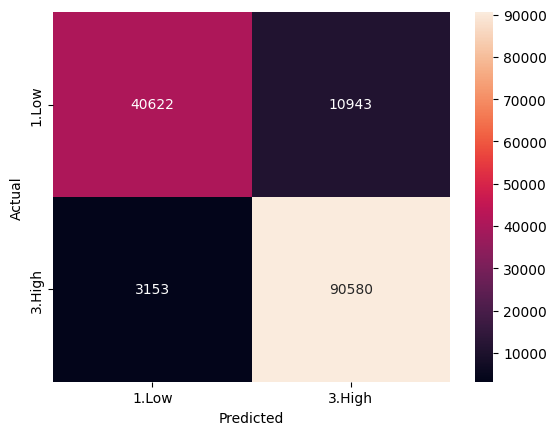

In [40]:
# ---------------------------------------------------
# Replicating the above steps for the KNN classifier
# ---------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ---------------------------------------------------
# hyperparameter tuning for KNN
# ---------------------------------------------------

# param_grid = {'n_neighbors': [5, 7, 9, 11 ]}
# knn = KNeighborsClassifier()
# knn_cv = GridSearchCV(knn, param_grid, cv = 5)

# knn_cv.fit(X_train, y_train)

# print(knn_cv.best_params_)
# print(knn_cv.best_score_)
# print(knn_cv.best_estimator_)

# results = pd.DataFrame(knn_cv.cv_results_)
# results

              precision    recall  f1-score   support

       1.Low       0.91      0.79      0.84     51565
      3.High       0.89      0.96      0.92     93733

    accuracy                           0.90    145298
   macro avg       0.90      0.87      0.88    145298
weighted avg       0.90      0.90      0.89    145298



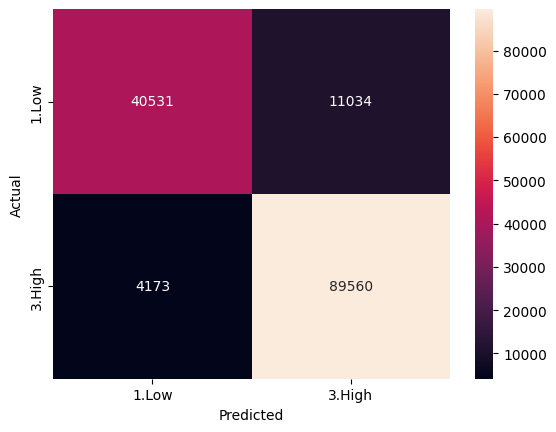

In [41]:
# ---------------------------------------------------
# And now Replicating for the SGD classifier
# ---------------------------------------------------

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log_loss')
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low', '3.High'], yticklabels=['1.Low', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ---------------------------------------------------
# hyperparameter tuning for SGD
# ---------------------------------------------------

# param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
# sgd = SGDClassifier()
# sgd_cv = GridSearchCV(sgd, param_grid, cv = 5)

# sgd_cv.fit(X_train, y_train)

# print(sgd_cv.best_params_)
# print(sgd_cv.best_score_)
# print(sgd_cv.best_estimator_)
# print(sgd_cv.best_index_)
# print(sgd_cv.best_estimator_.alpha)

# results = pd.DataFrame(sgd_cv.cv_results_)
# results



In [42]:
lc_cleaned.head()

,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,emp_length,home_ownership,funded_amnt,funded_amnt_inv,term,installment,total_rec_int,grade_tertiary
0,-1.322309,-0.331003,-1.462507,-0.073466,0.049882,0.003839,-0.654904,C,5+ years,MORTGAGE,-1.322306,-1.322061,-0.657457,-1.267431,-0.718118,2.Medium
1,1.092152,-0.194028,-0.300970,-0.073466,-0.028091,0.378504,2.132949,C,5+ years,MORTGAGE,1.092155,1.093176,-0.657457,1.453106,-0.665523,2.Medium
2,0.554334,-0.221423,-0.905198,-0.073466,-0.028091,0.285946,-0.527071,B,5+ years,MORTGAGE,0.554337,0.555185,1.521012,-0.059313,-0.090667,3.High
3,2.270775,0.422361,-0.186533,-0.073466,-0.028091,0.990039,0.922613,C,5+ years,MORTGAGE,2.270778,2.272179,1.521012,1.490641,3.124757,2.Medium
4,-0.544189,0.346107,0.764440,-0.073466,-0.028091,1.180419,0.016901,F,2-5 years,MORTGAGE,-0.544186,-0.543691,1.521012,-0.616297,-0.545361,1.Low


              precision    recall  f1-score   support

       1.Low       0.73      0.64      0.68     51780
    2.Medium       0.52      0.38      0.44     60293
      3.High       0.72      0.90      0.80     93322

    accuracy                           0.68    205395
   macro avg       0.66      0.64      0.64    205395
weighted avg       0.66      0.68      0.66    205395



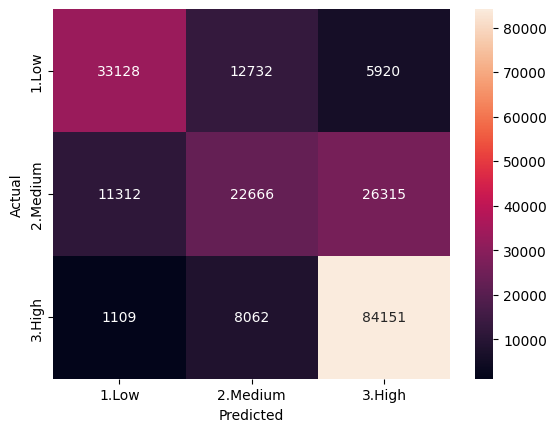

['1.Low' '2.Medium' '3.High']


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = lc_encoded2.drop(columns = ['grade_tertiary', 'grade'])
y = lc_encoded2['grade_tertiary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logit = LogisticRegression(max_iter = 1000)
logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)




# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


# print a labeled confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=['1.Low','2.Medium', '3.High'], yticklabels=['1.Low','2.Medium', '3.High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print(logit.classes_)

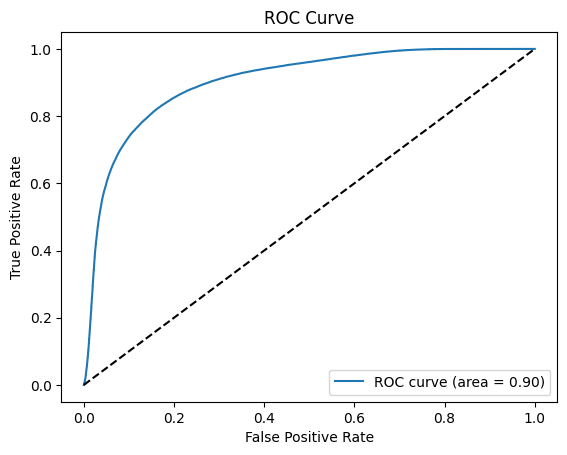

In [45]:
# ---------------------------------------------------
# Add predicted probability to the dataframe
# ---------------------------------------------------

lc_encoded2['predicted'] = logit.predict(X)
lc_encoded2['predicted_prob'] = logit.predict_proba(X)[:,2]
lc_encoded2.head()


# ---------------------------------------------------
# ROC curve
# ---------------------------------------------------

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,2], pos_label='3.High')
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()